# Technical Analyze with Python

### Implementation of technical indicators using Ta-lib, mplfinance and pandas_datareader libraries

Technical analysis is a trading discipline employed to evaluate investments and identify trading opportunities by analyzing statistical trends gathered from trading activity, such as price movement and volume.
Technical analysis can be used on any security with historical trading data. This includes stocks, futures, commodities, fixed-income, currencies, and other securities.

Across the industry there are hundreds of patterns and signals that have been developed by researchers to support technical analysis trading. Technical analysts have also developed numerous types of trading systems to help them forecast and trade on price movements. Some indicators are focused primarily on identifying the current market trend, including support and resistance areas, while others are focused on determining the strength of a trend and the likelihood of its continuation. 

This repository will present some indicators using Python with the intention of helping people who are looking for a technical platform for free and also improve their trading discipline. It will be presented the most popular and widely used indicators.

Indicators used in this repository:
- Golden Cross & Death Cross
- MACD
- RSI
- Bollinger Band
- Candle Stick

In [1]:
import pandas as pd 
import numpy as np 
import talib as ta 
from pandas_datareader import data 
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.simplefilter('ignore')

In [2]:
#define the period of the data that will be read
start= '2019-01-01' 
end= '2021-06-11' 

#get IBOVESPA data from Yahoo finance with DataReader:
df= data.DataReader('^BVSP', 'yahoo', start, end) 

In [3]:
df.head(10)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,91479.0,87536.0,87887.0,91012.0,5615400.0,91012.0
2019-01-03,91596.0,89922.0,91011.0,91564.0,6066200.0,91564.0
2019-01-04,92701.0,90824.0,91577.0,91841.0,5322100.0,91841.0
2019-01-07,92552.0,91288.0,91845.0,91699.0,4565000.0,91699.0
2019-01-08,92231.0,91064.0,91699.0,92032.0,4496500.0,92032.0
2019-01-09,93626.0,92028.0,92033.0,93613.0,5011400.0,93613.0
2019-01-10,93987.0,93050.0,93599.0,93806.0,4840600.0,93806.0
2019-01-11,93961.0,93359.0,93806.0,93658.0,5330500.0,93658.0
2019-01-14,94474.0,93335.0,93645.0,94474.0,4486900.0,94474.0


In [4]:
date=df.index #define date as df's index
close=df['Adj Close'] 

# Golden Cross & Death Cross

The golden cross occurs when a short-term moving average crosses over a major long-term moving average to the upside and is interpreted by analysts and traders as signaling a definitive upward turn in a market. Basically, the short-term average trends up faster than the long-term average, until they cross.

Conversely, a similar downside moving average crossover constitutes the death cross and is understood to signal a decisive downturn in a market. The death cross occurs when the short term average trends down and crosses the long-term average, basically going in the opposite direction of the golden cross.

In [5]:
#define three spans of days for each moving averages:
span01=5 #short term moving average
span02=25 #mid term moving average
span03=50 #long term moving average

df['sma01']=close.rolling(window=span01).mean()
df['sma02']=close.rolling(window=span02).mean()
df['sma03']=close.rolling(window=span03).mean()

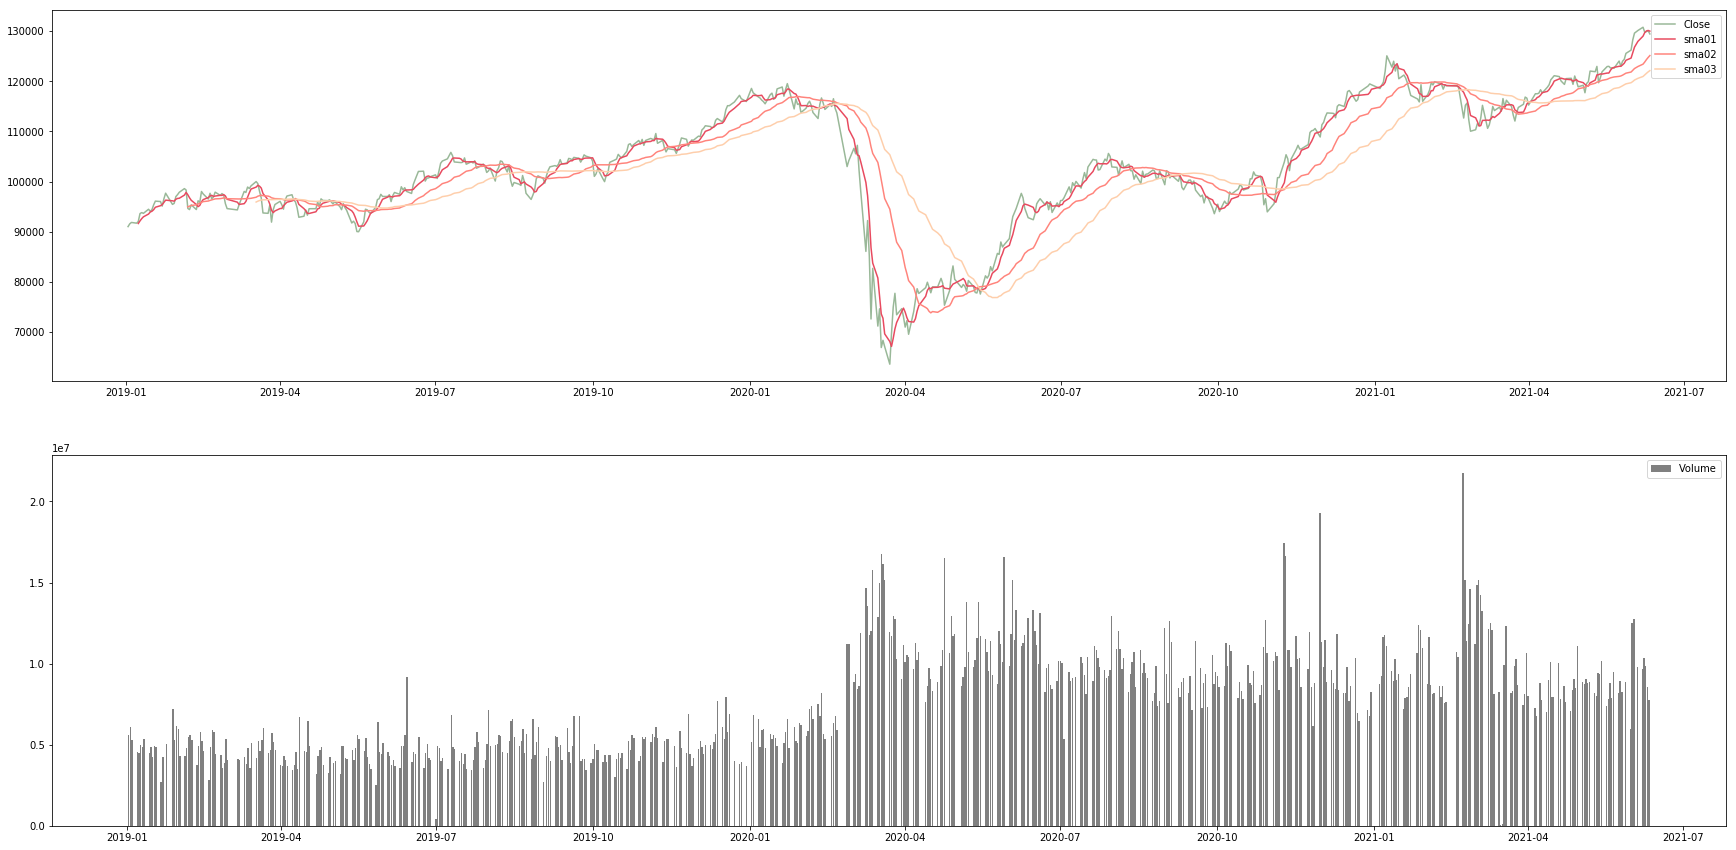

In [6]:
plt.figure(figsize=(30,15))
plt.subplot(2,1,1)

plt.plot(date,close,label='Close', color='#99b898')
plt.plot(date,df['sma01'],label='sma01',color='#e84a5f')
plt.plot(date,df['sma02'],label='sma02',color='#ff847c')
plt.plot(date,df['sma03'],label='sma03',color='#feceab')
plt.legend()

#Trading volume graph
plt.subplot(2,1,2)
plt.bar(date,df['Volume'], label='Volume', color='grey')
plt.legend()

# MACD

Standard MACD is the 12-day Exponential Moving Average (EMA) less the 26-day EMA. Closing prices are used to form the MACD's moving averages. A 9-day EMA of MACD is plotted along side to act as a signal line to identify turns in the indicator. The MACD-Histogram represents the difference between MACD and its 9-day EMA, the signal line. The histogram is positive when MACD is above its 9-day EMA and negative when MACD is below its 9-day EMA.

The MACD-Histogram is an indicator of an indicator. In fact, MACD itself is an indicator of an indicator. This means that the MACD-Histogram is four steps removed from the price of the underlying security. In other words, it is the fourth derivative of price.

- First derivative: 12-day EMA and 26-day EMA
- Second derivative: MACD (12-day EMA less the 26-day EMA)
- Third derivative: MACD signal line (9-day EMA of MACD)
- Fourth derivative: MACD-Histogram (MACD less MACD signal line)

As with MACD, the MACD-Histogram is designed to identify convergence, divergence and crossovers. The MACD-Histogram, however, is measuring the distance between MACD and its signal line. The histogram is positive when MACD is above its signal line. Positive values increase as MACD diverges further from its signal line (to the upside) and decrease as MACD and its signal line converge. The MACD-Histogram crosses the zero line as MACD crosses below its signal line. The indicator is negative when MACD is below its signal line. Negative values increase as MACD diverges further from its signal line (to the downside). Conversely, negative values decrease as MACD converges on its signal line.

In [40]:
#create 3 columns to df to receive the short term moving average(12-day EMA), long term moving average (26-day EMA) and the MACD signal line
df['macd'], df['macdsignal'], df['macdhist']=ta.MACD(close, fastperiod=12, slowperiod=26, signalperiod=9)

In [9]:
#Check if the columns and the data from MACD function was properly received
df.tail()

,High,Low,Open,Close,Volume,Adj Close,sma01,sma02,sma03,macd,macdsignal,macdhist
Date,,,,,,,,,,,,
2021-06-07,131190.0,129498.0,130125.0,130776.0,9655400.0,130776.0,128997.2,123415.36,120956.14,2523.537484,1850.285715,673.251769
2021-06-08,130776.0,129230.0,130776.0,129787.0,10346600.0,129787.0,129711.4,123838.48,121276.88,2582.006601,1996.629893,585.376709
2021-06-09,130882.0,129281.0,129800.0,129907.0,9833700.0,129907.0,130039.4,124326.28,121579.40,2607.963811,2118.896676,489.067135
2021-06-10,130527.0,129526.0,129911.0,130076.0,8537900.0,130076.0,130134.4,124746.76,121872.54,2612.061753,2217.529692,394.532061
2021-06-11,130294.0,128678.0,130076.0,129441.0,7748200.0,129441.0,129997.4,125127.56,122124.36,2534.850035,2280.993760,253.856275


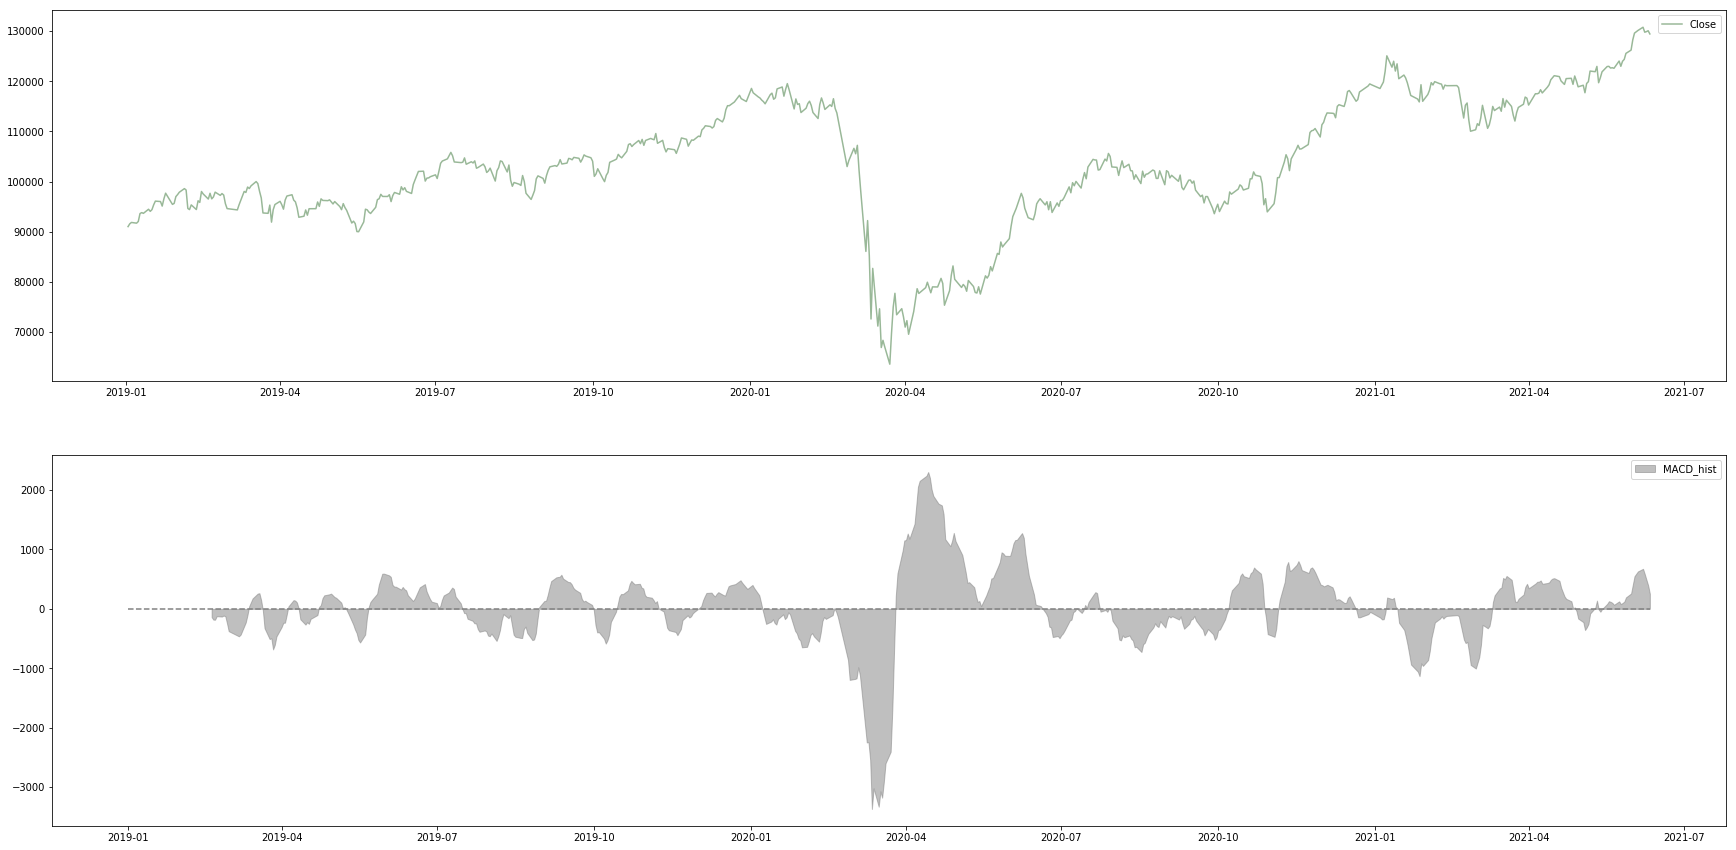

In [10]:
plt.figure(figsize=(30,15))
plt.subplot(2,1,1)

plt.plot(date,close,label='Close', color='#99b898')
plt.legend()

plt.subplot(2,1,2)
plt.fill_between(date, df['macdhist'],color='grey', alpha=0.5, label='MACD_hist')
plt.hlines(0, start, end, "gray", linestyles='dashed')
plt.legend()

# RSI

The relative strength index (RSI) is a momentum indicator used in technical analysis that measures the magnitude of recent price changes to evaluate overbought or oversold conditions in the price of a stock or other asset. The RSI is displayed as an oscillator (a line graph that moves between two extremes) and can have a reading from 0 to 100.
The RSI provides technical traders with signals about bullish and bearish price momentum, and it is often plotted beneath the graph of an asset’s price.

An asset is usually considered overbought when the RSI is above 70% and oversold when it is below 30%.
Generally, when the RSI surpasses the horizontal 30 reference level, it is a bullish sign, and when it slides below the horizontal 70 reference level, it is a bearish sign. Put another way, one can interpret that RSI values of 70 or above indicate a security is becoming overbought or overvalued and may be primed for a trend reversal or corrective price pullback. An RSI reading of 30 or below indicates an oversold or undervalued condition.

In [11]:
df['RSI']= ta.RSI(close, timeperiod=span02)

In [12]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close,sma01,sma02,sma03,macd,macdsignal,macdhist,RSI
Date,,,,,,,,,,,,,
2021-06-07,131190.0,129498.0,130125.0,130776.0,9655400.0,130776.0,128997.2,123415.36,120956.14,2523.537484,1850.285715,673.251769,68.542003
2021-06-08,130776.0,129230.0,130776.0,129787.0,10346600.0,129787.0,129711.4,123838.48,121276.88,2582.006601,1996.629893,585.376709,65.832576
2021-06-09,130882.0,129281.0,129800.0,129907.0,9833700.0,129907.0,130039.4,124326.28,121579.40,2607.963811,2118.896676,489.067135,66.002432
2021-06-10,130527.0,129526.0,129911.0,130076.0,8537900.0,130076.0,130134.4,124746.76,121872.54,2612.061753,2217.529692,394.532061,66.248580
2021-06-11,130294.0,128678.0,130076.0,129441.0,7748200.0,129441.0,129997.4,125127.56,122124.36,2534.850035,2280.993760,253.856275,64.422982


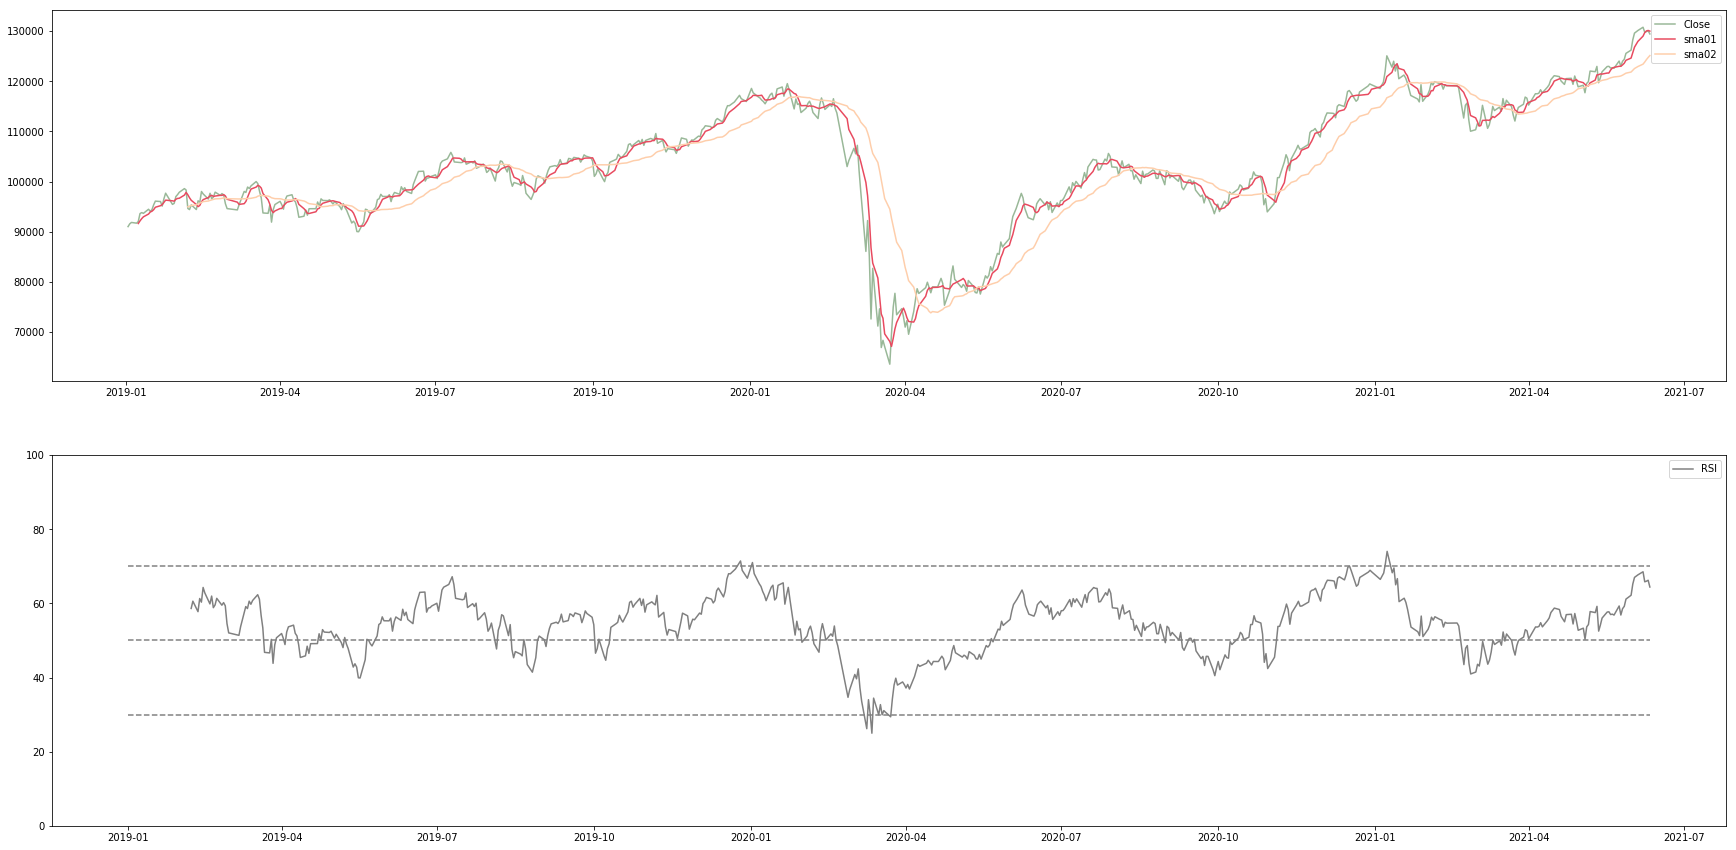

In [13]:
plt.figure(figsize=(30,15))
plt.subplot(2,1,1)

plt.plot(date, close, label='Close', color='#99b898')
plt.plot(date,df['sma01'], label='sma01', color='#e84a5f')
plt.plot(date,df['sma02'], label='sma02', color='#feceab')
plt.legend()

plt.subplot(2,1,2)
plt.plot(date,df['RSI'], label='RSI', color='gray')
plt.ylim(0, 100)
plt.hlines([30,50,70], start, end, "gray", linestyles='dashed')
plt.legend()

savename='RSI.png'
plt.savefig(savename, dpi=300)

# Bollinger Band

A Bollinger Band is a technical analysis tool defined by a set of trendlines plotted two standard deviations (positively and negatively) away from a simple moving average (SMA) of a security's price, but which can be adjusted to user preferences.
There are three lines that compose Bollinger Bands: A simple moving average (middle band) and an upper and lower band.
The upper and lower bands are typically 2 standard deviations +/- from a 20-day simple moving average, but can be modified.
Many traders believe the closer the prices move to the upper band, the more overbought the market, and the closer the prices move to the lower band, the more oversold the market.


In [14]:
df['upper'], df['middle'], df['lower']= ta.BBANDS(close, timeperiod=span02, nbdevup=2, nbdevdn=2, matype=0)

In [15]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close,sma01,sma02,sma03,macd,macdsignal,macdhist,RSI,upper,middle,lower
Date,,,,,,,,,,,,,,,,
2021-06-07,131190.0,129498.0,130125.0,130776.0,9655400.0,130776.0,128997.2,123415.36,120956.14,2523.537484,1850.285715,673.251769,68.542003,130138.812491,123415.36,116691.907509
2021-06-08,130776.0,129230.0,130776.0,129787.0,10346600.0,129787.0,129711.4,123838.48,121276.88,2582.006601,1996.629893,585.376709,65.832576,130777.743964,123838.48,116899.216036
2021-06-09,130882.0,129281.0,129800.0,129907.0,9833700.0,129907.0,130039.4,124326.28,121579.40,2607.963811,2118.896676,489.067135,66.002432,131188.385905,124326.28,117464.174095
2021-06-10,130527.0,129526.0,129911.0,130076.0,8537900.0,130076.0,130134.4,124746.76,121872.54,2612.061753,2217.529692,394.532061,66.248580,131677.999342,124746.76,117815.520658
2021-06-11,130294.0,128678.0,130076.0,129441.0,7748200.0,129441.0,129997.4,125127.56,122124.36,2534.850035,2280.993760,253.856275,64.422982,132002.275484,125127.56,118252.844516


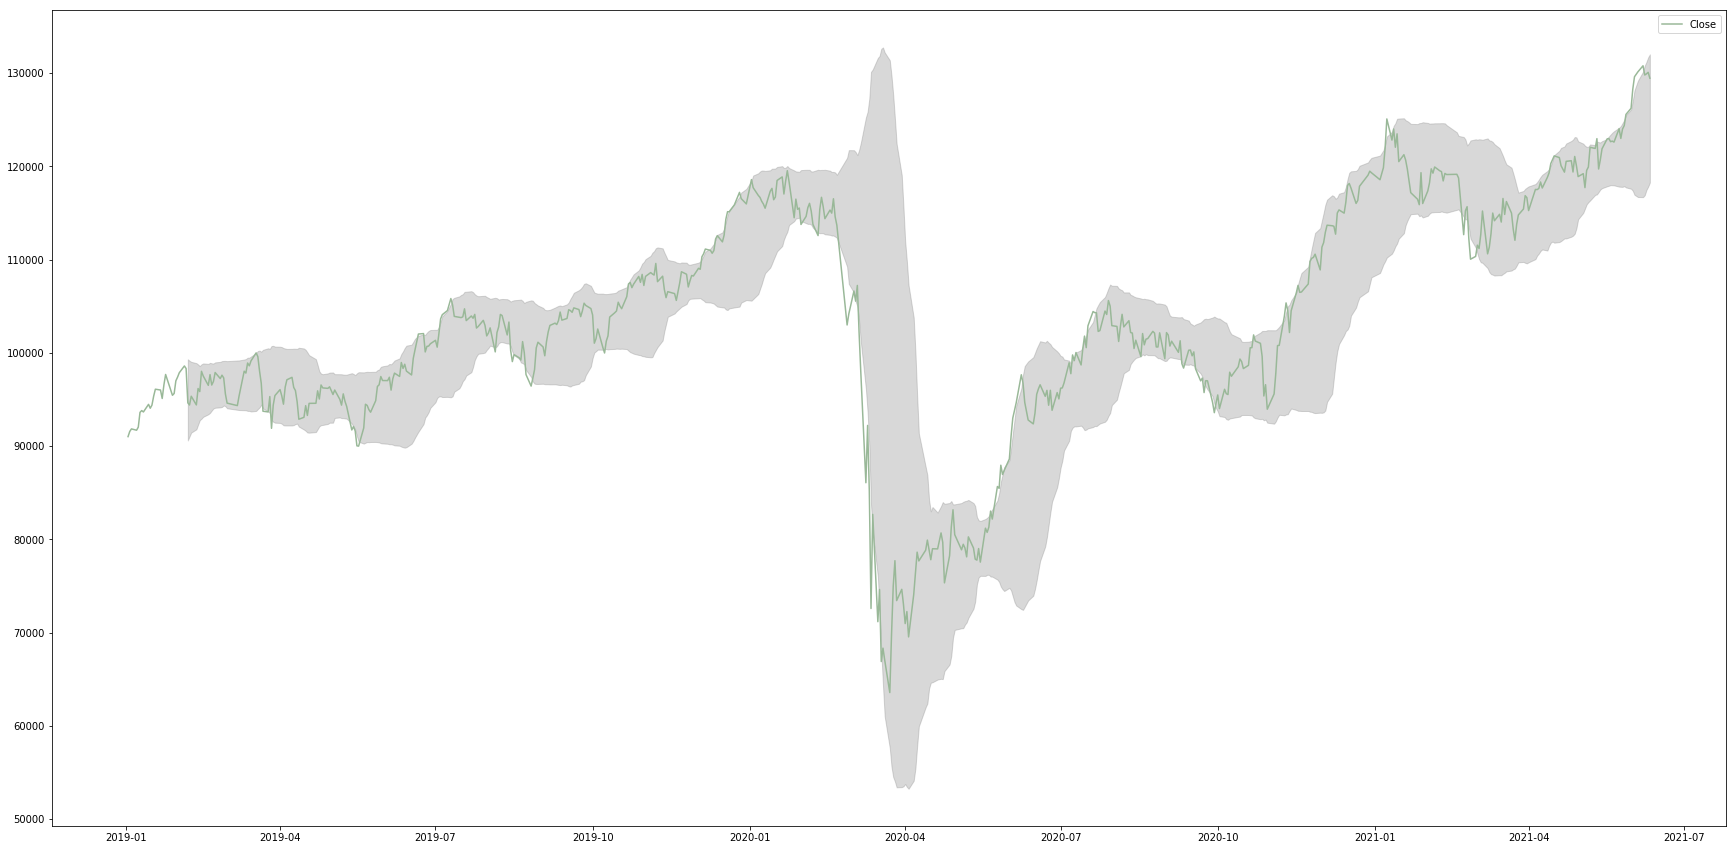

In [16]:
plt.figure(figsize=(30, 15))

plt.plot(date, close, label='Close', color='#99b898')
plt.fill_between(date, df['upper'], df['lower'], color='gray', alpha=0.3)
plt.legend()

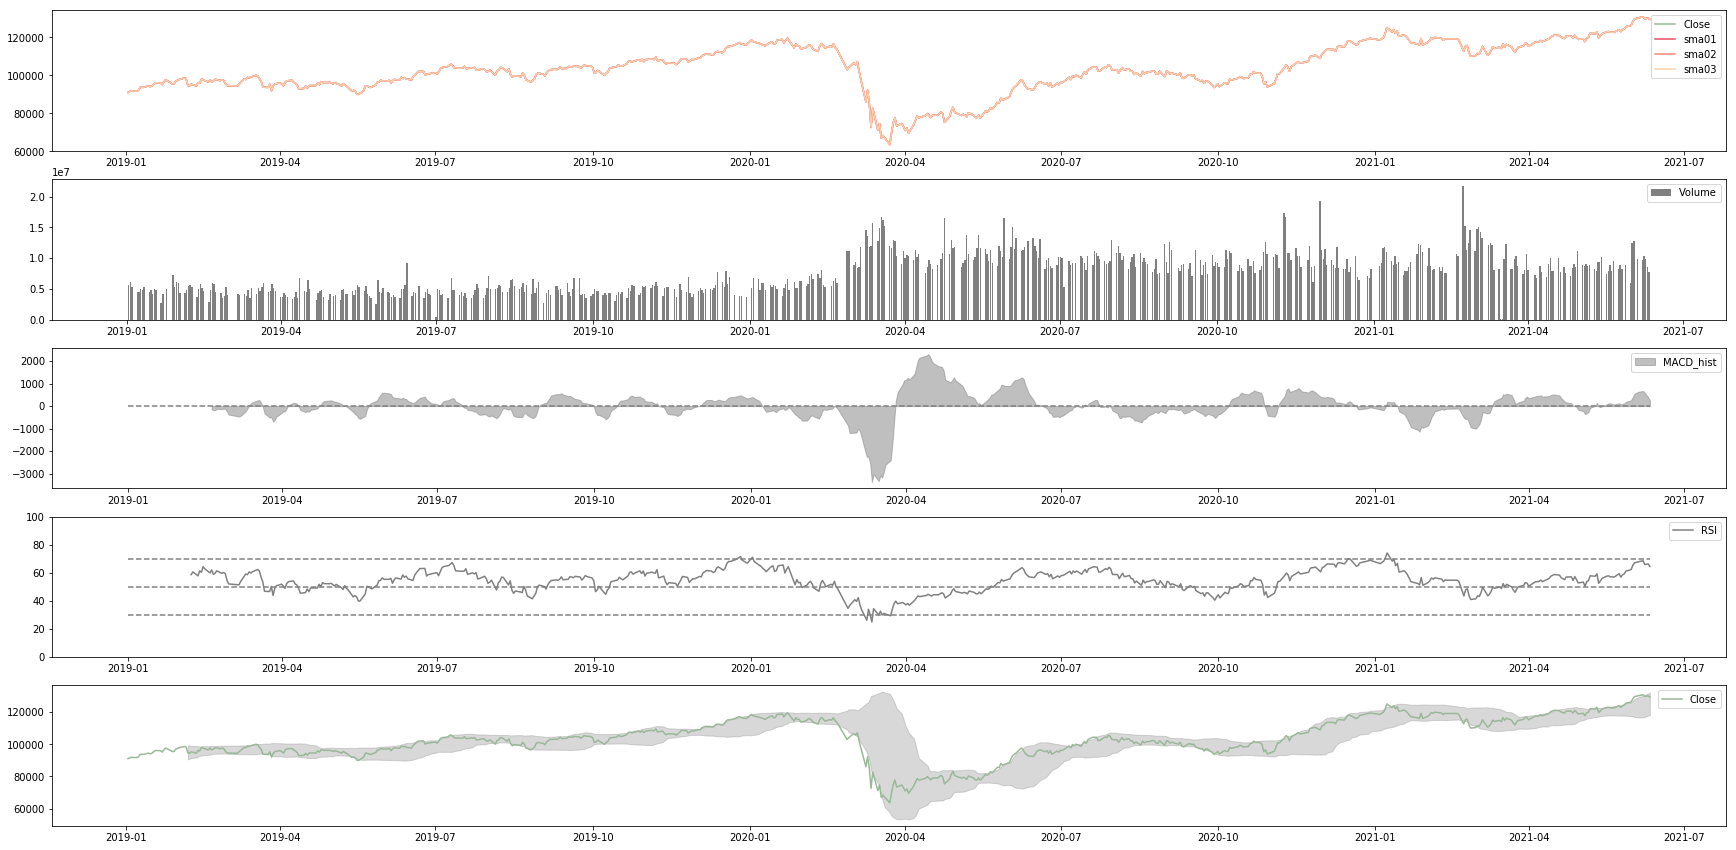

In [17]:
plt.figure(figsize=(30, 15))
plt.subplot(5,1,1)

plt.plot(date, close, label='Close', color='#99b898')
plt.plot(date, close, label='sma01', color='#e84a5f')
plt.plot(date, close, label='sma02', color='#ff847c')
plt.plot(date, close, label='sma03', color='#feceab')
plt.legend()

plt.subplot(5,1,2)
plt.bar(date,df['Volume'], label='Volume', color='grey')
plt.legend()

plt.subplot(5,1,3)
plt.fill_between(date, df['macdhist'],color='grey', alpha=0.5, label='MACD_hist')
plt.hlines(0, start, end, "gray", linestyles='dashed')
plt.legend()

plt.subplot(5,1,4)
plt.plot(date,df['RSI'], label='RSI', color='gray')
plt.ylim(0, 100)
plt.hlines([30,50,70], start, end, "gray", linestyles='dashed')
plt.legend()

plt.subplot(5,1,5)
plt.plot(date, close, label='Close', color='#99b898')
plt.fill_between(date, df['upper'], df['lower'], color='gray', alpha=0.3)
plt.legend()

### Analyse using Bitcoin data

In [18]:
start= '2019-01-01'
end='2021-06-10'

df=data.DataReader('BTC-USD', 'yahoo', start, end)

In [19]:
df.head(30)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-01,3850.913818,3707.231201,3746.713379,3843.520020,4.324201e+09,3843.520020
2019-01-02,3947.981201,3817.409424,3849.216309,3943.409424,5.244857e+09,3943.409424
2019-01-03,3935.685059,3826.222900,3931.048584,3836.741211,4.530215e+09,3836.741211
2019-01-04,3865.934570,3783.853760,3832.040039,3857.717529,4.847965e+09,3857.717529
2019-01-05,3904.903076,3836.900146,3851.973877,3845.194580,5.137610e+09,3845.194580
2019-01-06,4093.297363,3826.513184,3836.519043,4076.632568,5.597027e+09,4076.632568
2019-01-07,4092.613525,4020.894043,4078.584961,4025.248291,5.228626e+09,4025.248291
2019-01-08,4109.020996,3996.955322,4028.472168,4030.847900,5.306593e+09,4030.847900
2019-01-09,4068.403564,4022.662842,4031.552002,4035.296387,5.115905e+09,4035.296387


In [20]:
#def company_stock(start, end, company_code):
    #df= data.DataReader(company_code, 'yahoo')
    #df= df[(df.index>=start)&(df.index<=end)]
    
date=df.index
close=df['Adj Close']
    
span01=5
span02=25
span03=50

df['sma01']=close.rolling(window=span01).mean()
df['sma02']=close.rolling(window=span02).mean()
df['sma03']=close.rolling(window=span03).mean()
df['macd'], df['macdsignal'], df['macdhist']=ta.MACD(close, fastperiod=12, slowperiod=26, signalperiod=9)
df['RSI']=ta.RSI(close, timeperiod=span02)
df['upper'], df['middle'], df['lower']=ta.BBANDS(close, timeperiod=span02, nbdevup=2, nbdevdn=2, matype=0)

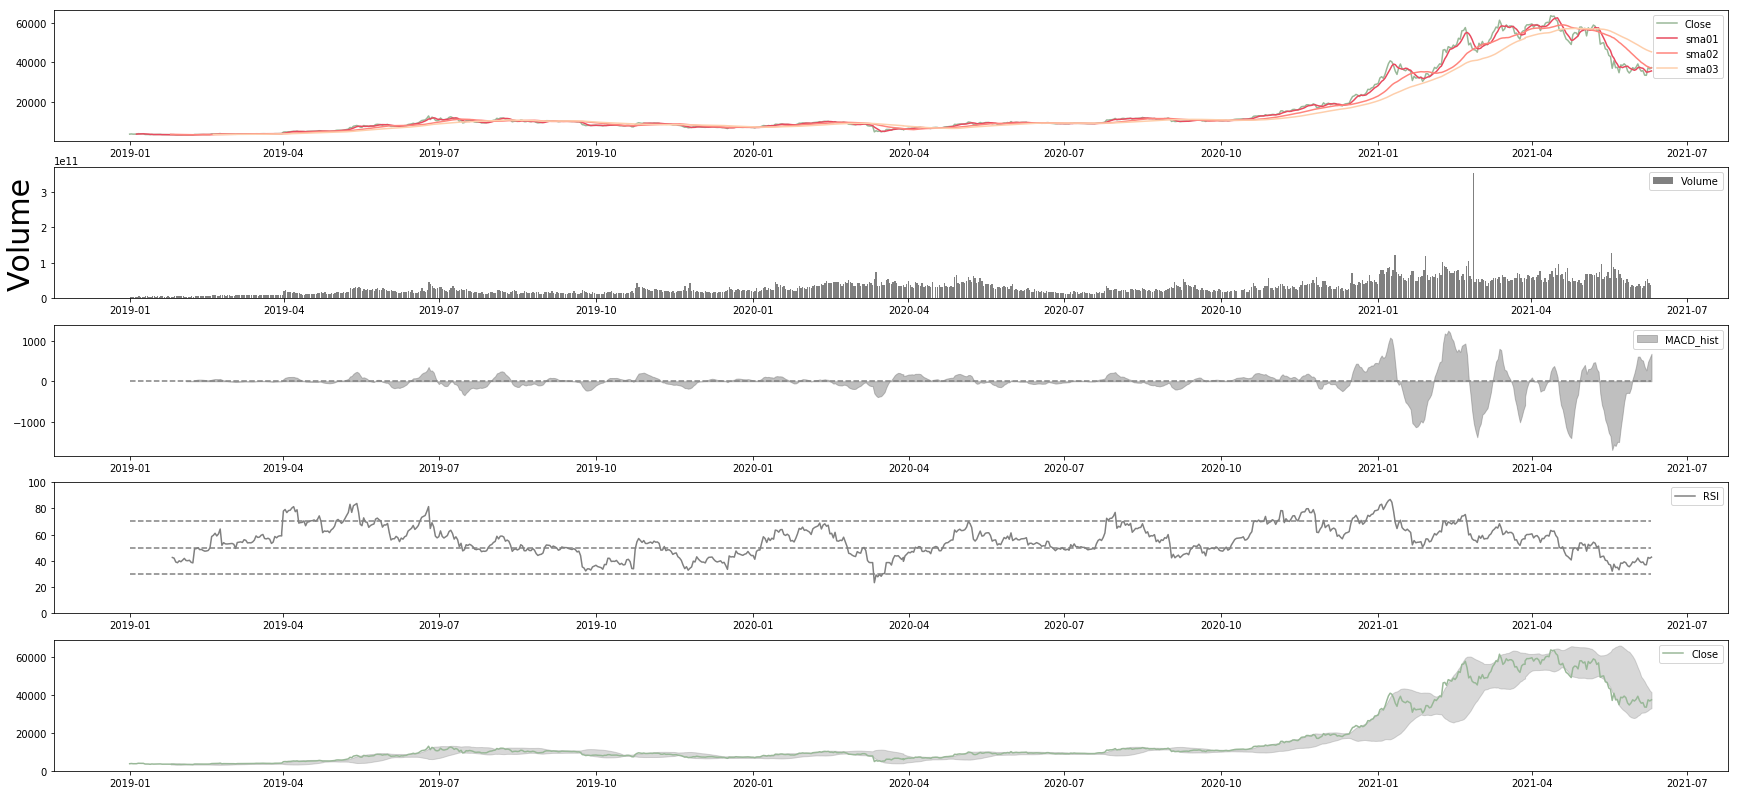

In [21]:
plt.figure(figsize=(30, 14))
plt.subplot(5,1,1)
    
#plt.title(company_code, color='blue', backgroundcolor='white', size=40, loc='center')
#plt.ylabel('Close price', color='black', size=30)
    
plt.plot(date, close, label='Close', color='#99b898')
plt.plot(date,df['sma01'], label='sma01', color='#e84a5f')
plt.plot(date,df['sma02'], label='sma02', color='#ff847c')
plt.plot(date,df['sma03'], label='sma03', color='#feceab')
plt.legend()
    
plt.subplot(5,1,2)
plt.bar(date, df['Volume'], label='Volume', color='grey')
plt.ylabel('Volume', color='black', size=30)
plt.legend()
    
plt.subplot(5,1,3)
plt.fill_between(date, df['macdhist'], color='grey', alpha=0.5, label='MACD_hist')
plt.hlines(0, start, end, 'gray', linestyles='dashed')
plt.legend()
    
plt.subplot(5,1,4)
plt.plot(date, df['RSI'], label='RSI', color='gray')
plt.ylim(0,100)
plt.hlines([30,50,70], start, end, 'gray', linestyles='dashed')
plt.legend()
    
plt.subplot(5,1,5)
plt.plot(date, close, label='Close', color='#99b898')
plt.fill_between(date, df['upper'], df['lower'], color='gray', alpha=0.3)
plt.legend()

### Analayse using USD/BRL FX data 

In [22]:
start= '2019-01-01'
end='2021-06-10'

df=data.DataReader('BRL=X', 'yahoo', start, end)

In [23]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-01,3.8800,3.8799,3.8800,3.8800,0.0,3.8800
2019-01-02,3.8959,3.8043,3.8799,3.8799,0.0,3.8799
2019-01-03,3.8047,3.7377,3.7866,3.7863,0.0,3.7863
2019-01-04,3.7836,3.7115,3.7550,3.7551,0.0,3.7551
2019-01-07,3.7229,3.6906,3.7137,3.6612,0.0,3.6612


In [25]:
df=df.dropna()

In [26]:
date=df.index
close=df['Adj Close']
    
span01=5
span02=25
span03=50

df['sma01']=close.rolling(window=span01).mean()
df['sma02']=close.rolling(window=span02).mean()
df['sma03']=close.rolling(window=span03).mean()
df['macd'], df['macdsignal'], df['macdhist']=ta.MACD(close, fastperiod=12, slowperiod=26, signalperiod=9)
df['RSI']=ta.RSI(close, timeperiod=span02)
df['upper'], df['middle'], df['lower']=ta.BBANDS(close, timeperiod=span02, nbdevup=2, nbdevdn=2, matype=0)

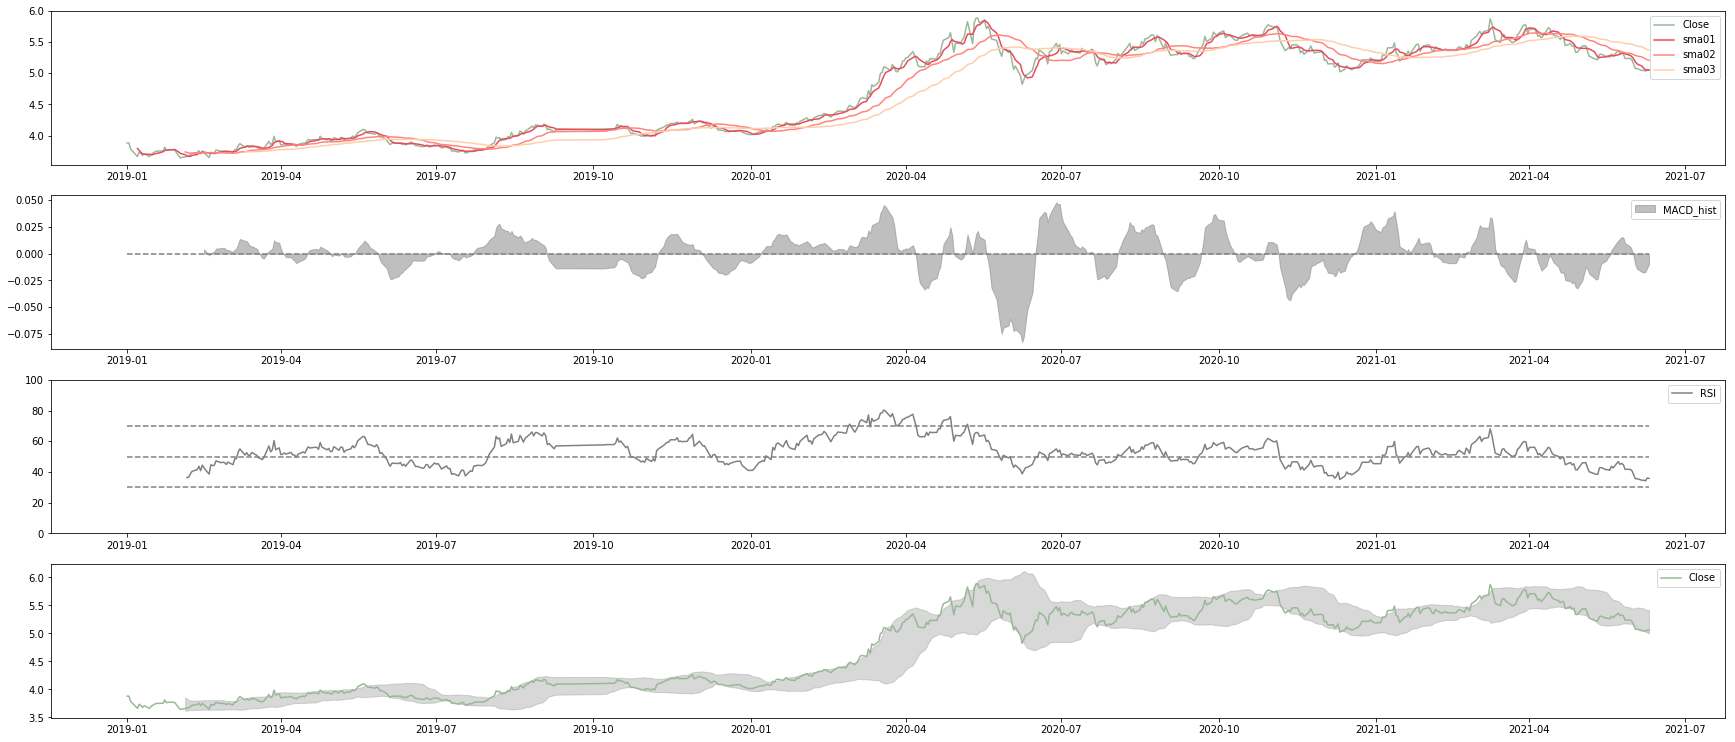

In [28]:
plt.figure(figsize=(30, 13))

plt.subplot(4,1,1)
plt.plot(date, close, label='Close', color='#99b898')
plt.plot(date,df['sma01'], label='sma01', color='#e84a5f')
plt.plot(date,df['sma02'], label='sma02', color='#ff847c')
plt.plot(date,df['sma03'], label='sma03', color='#feceab')
plt.legend()
    
plt.subplot(4,1,2)
plt.fill_between(date, df['macdhist'], color='grey', alpha=0.5, label='MACD_hist')
plt.hlines(0, start, end, 'gray', linestyles='dashed')
plt.legend()
    
plt.subplot(4,1,3)
plt.plot(date, df['RSI'], label='RSI', color='gray')
plt.ylim(0,100)
plt.hlines([30,50,70], start, end, 'gray', linestyles='dashed')
plt.legend()

plt.subplot(4,1,4)
plt.plot(date, close, label='Close', color='#99b898')
plt.fill_between(date, df['upper'], df['lower'], color='gray', alpha=0.3)
plt.legend()

# Candlestick

Candlestick charts are a technical tool that packs data for multiple time frames into single price bars. This makes them more useful than traditional open-high, low-close bars or simple lines that connect the dots of closing prices. Candlesticks build patterns that predict price direction once completed. 

In [30]:
import mplfinance as mpf

In [31]:
start= '2019-01-01'
end='2021-06-10'

df=data.DataReader('^BVSP', 'yahoo', start, end)

In [32]:
date=df.index
close=df['Adj Close']

In [33]:
span01=5
span02=25
span03=50

df['upper'], df['middle'], df['lower']= ta.BBANDS(close, timeperiod=span02, nbdevup=2, nbdevdn=2, matype=0)

In [34]:
df_candle=df[['High', 'Low', 'Open', 'Close', 'Volume']]

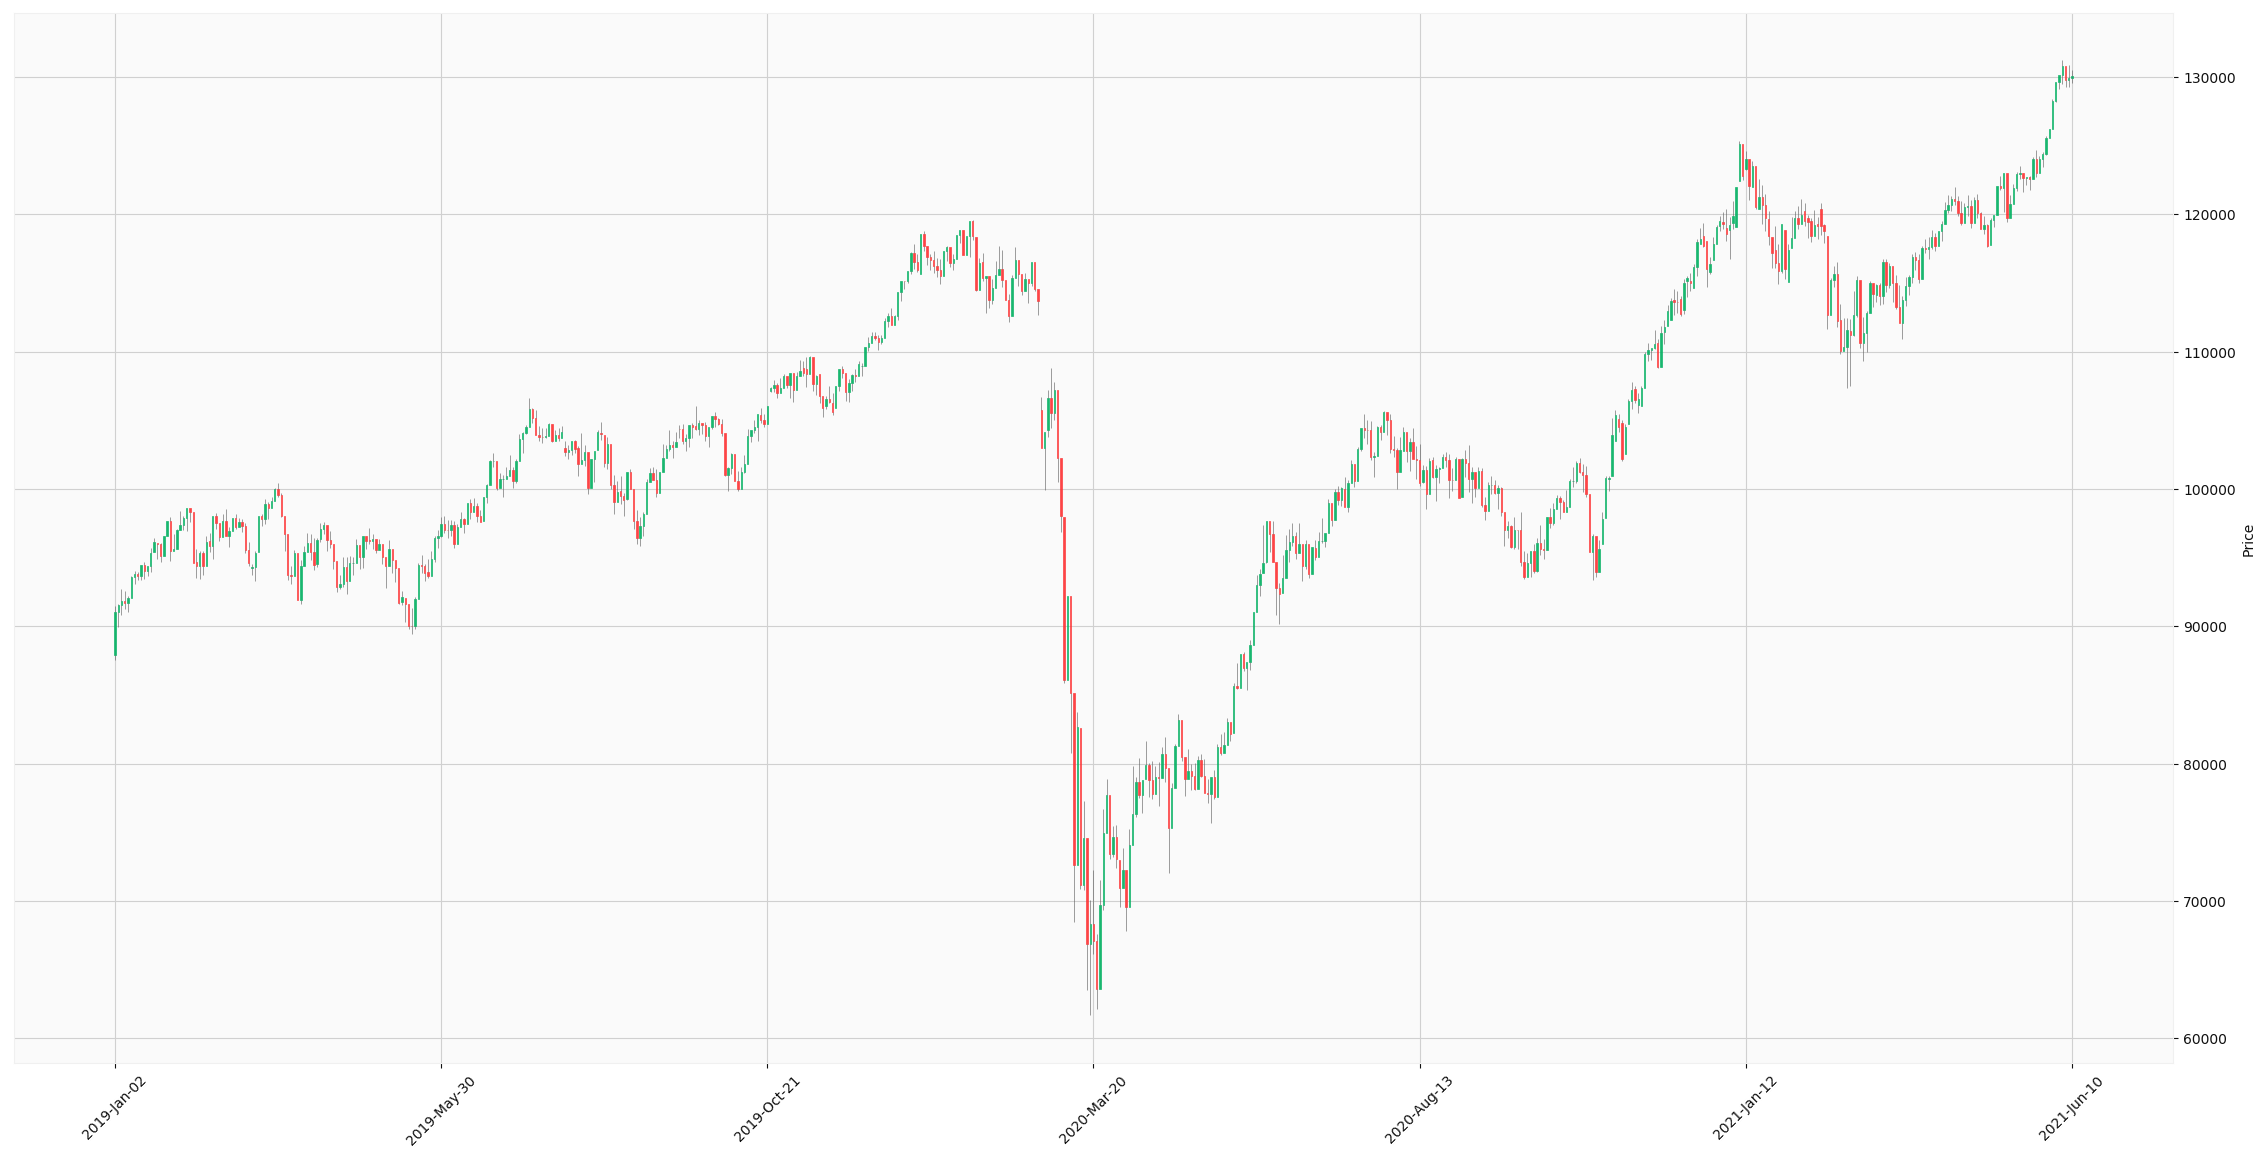

In [35]:
mpf.plot(df_candle, type='candle', style='yahoo', figsize=(30,15))

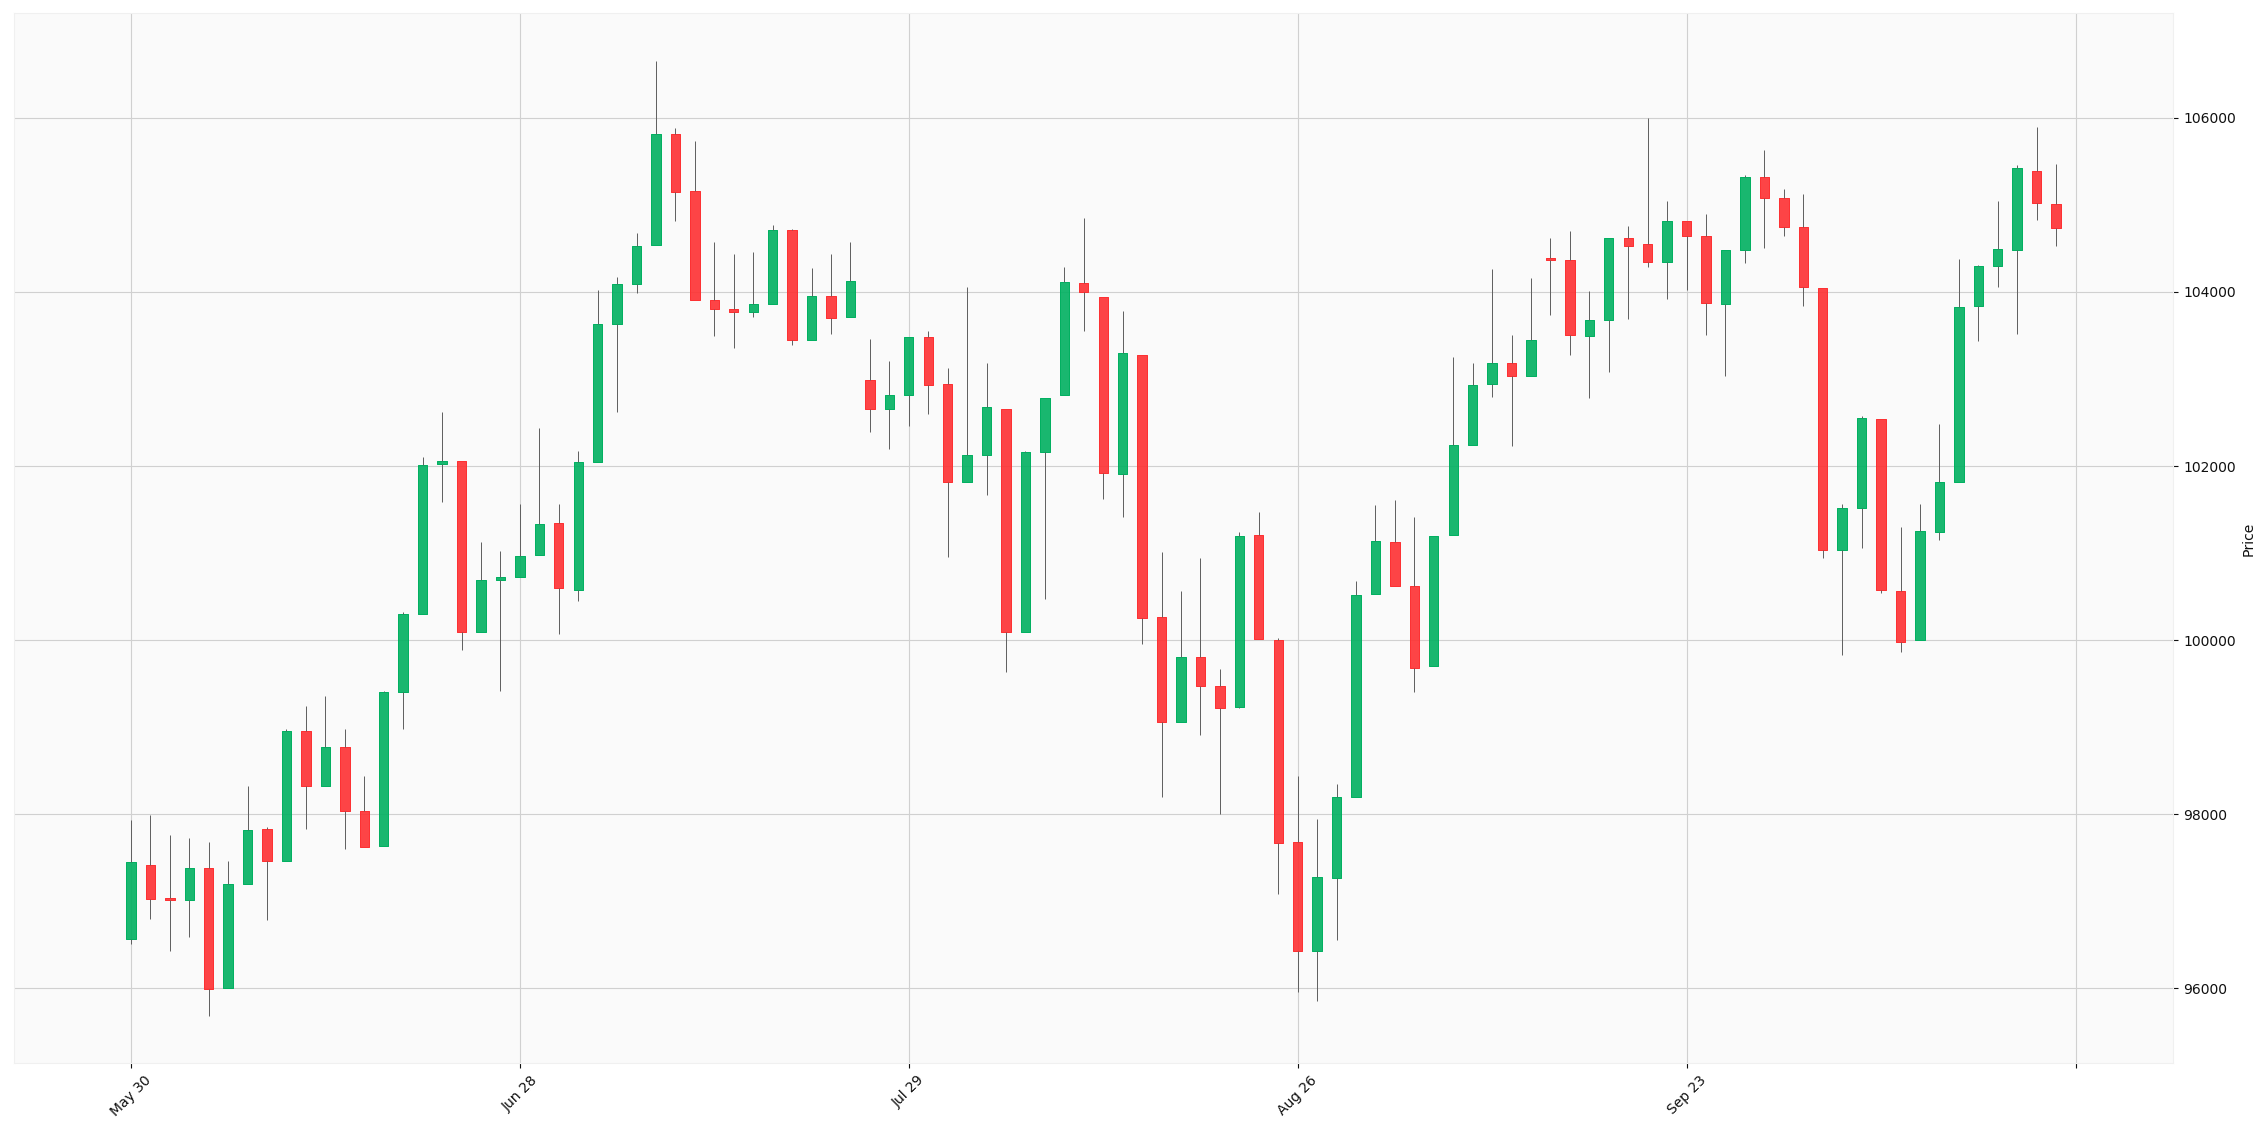

In [36]:
mpf.plot(df_candle[100:200], type='candle', style='yahoo', figsize=(30, 15))

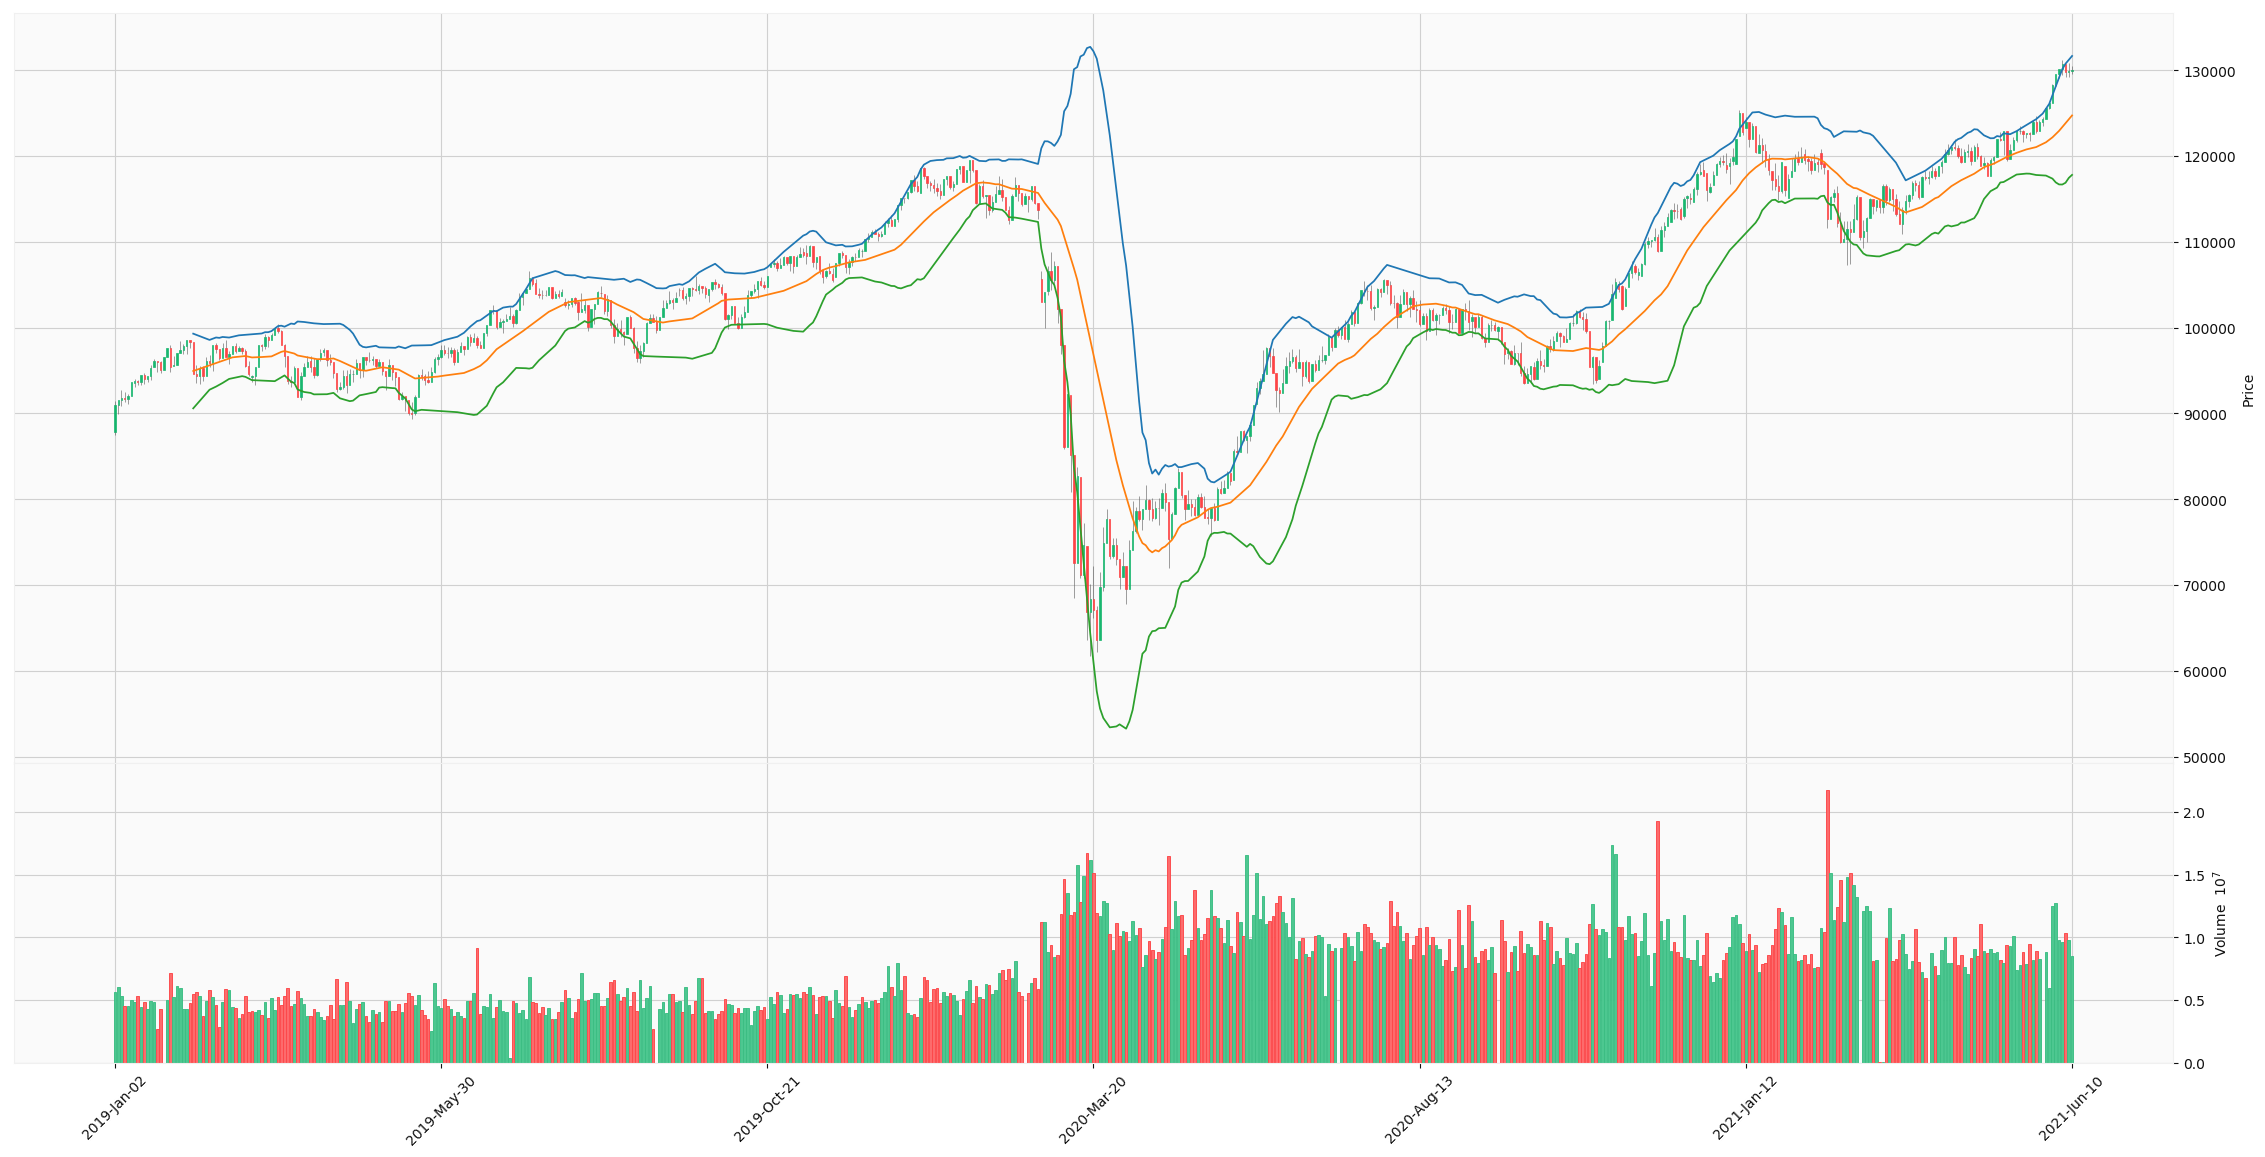

In [37]:
tcdf= df[['upper', 'middle', 'lower']]
apd= mpf.make_addplot(tcdf)

mpf.plot(df_candle, addplot=apd, type='candle', volume=True, style='yahoo', figsize=(30,15))